<a href="https://colab.research.google.com/github/janhavishembade/Book-Recommonder-System/blob/main/BOOK_RECOMMONDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BUISNESS CONTEXT

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# THERE ARE 3 CSV FILE FOR BOOK RECOOMONDER SYSTEM

# Users

# Books

# Ratings

In [ ]:
#Import Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# check first 3 rows of books
df_book=pd.read_csv("Books.csv",low_memory=False)
df_book.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [ ]:
#df_book.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)

In [ ]:
# replacing '-' with '_' and features name in lower case
df_book.columns= df_book.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
df_book.head(3) #First 3 rows

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [ ]:
df_book.tail() # Last 3 rows

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [ ]:
df_book.describe() #Describe Book Data

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [ ]:
df_book.isnull().sum() #Chek the null values in book data

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64

In [ ]:
df_book.loc[(df_book['book_author'].isnull()),: ] #Chek null value for book data

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [ ]:
df_book['book_author'].fillna('Larissa Anne Downes',inplace=True) #Fiil the null values

In [ ]:
df_book.loc[(df_book['publisher'].isnull()),: ] #chek null value for publisher data

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [ ]:
# replacing 'Nan' with 'No Mention'
df_book.loc[(df_book['isbn'] == '193169656X'),'publisher'] = 'No Mention'
df_book.loc[(df_book['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [ ]:
df_book.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64

In [ ]:
# getting unique value from 'year_of_publication' feature
df_book['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [ ]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
df_book[df_book['year_of_publication'] == 'DK Publishing Inc'] 

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
df_book[df_book['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
df_book.loc[221678]

isbn                                                          0789466953
book_title             DK Readers: Creating the X-Men, How Comic Book...
book_author                                                         2000
year_of_publication                                    DK Publishing Inc
publisher              http://images.amazon.com/images/P/0789466953.0...
image_url_s            http://images.amazon.com/images/P/0789466953.0...
image_url_m            http://images.amazon.com/images/P/0789466953.0...
image_url_l                                                          NaN
Name: 221678, dtype: object

In [ ]:
df_book.loc[209538]

isbn                                                          078946697X
book_title             DK Readers: Creating the X-Men, How It All Beg...
book_author                                                         2000
year_of_publication                                    DK Publishing Inc
publisher              http://images.amazon.com/images/P/078946697X.0...
image_url_s            http://images.amazon.com/images/P/078946697X.0...
image_url_m            http://images.amazon.com/images/P/078946697X.0...
image_url_l                                                          NaN
Name: 209538, dtype: object

In [ ]:
df_book.loc[220731]

isbn                                                          2070426769
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-M...
book_author                                                         2003
year_of_publication                                            Gallimard
publisher              http://images.amazon.com/images/P/2070426769.0...
image_url_s            http://images.amazon.com/images/P/2070426769.0...
image_url_m            http://images.amazon.com/images/P/2070426769.0...
image_url_l                                                          NaN
Name: 220731, dtype: object

In [ ]:
df_book[df_book['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


# USER DATASET

In [ ]:
#dataframe for User Dataset
df_user=pd.read_csv("Users.csv")
df_user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
df_user.columns= df_user.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
df_user.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# users_data size
print(df_user.shape)

(278858, 3)


In [ ]:
# unique value in age
df_user['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [ ]:
# replacing nan with average of 'age'
df_user['age'].fillna((df_user['age'].mean()), inplace=True)

In [ ]:
df_user['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [ ]:
# retrieving age data between 5 to 90
df_user.loc[(df_user['age'] > 90) | (df_user['age'] < 5)] = np.nan

In [ ]:
df_user['age'].fillna((df_user['age'].mean()), inplace=True)

In [ ]:
df_user['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

# RATING DATASET

In [ ]:
#Dataframe for Rating data
df_rating=pd.read_csv("Ratings.csv")
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
df_rating.columns= df_rating.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
# finding unique ISBNs from rating and book dataset
unique_ratings = df_rating[df_rating.isbn.isin(df_book.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [ ]:
print(df_rating.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [ ]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

# Data Visualizations

Text(0.5, 1.0, 'Top 20 author with number of books')

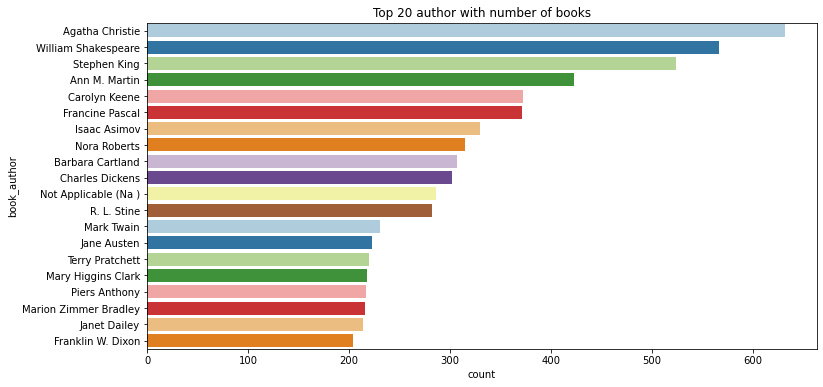

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=df_book,order=df_book['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

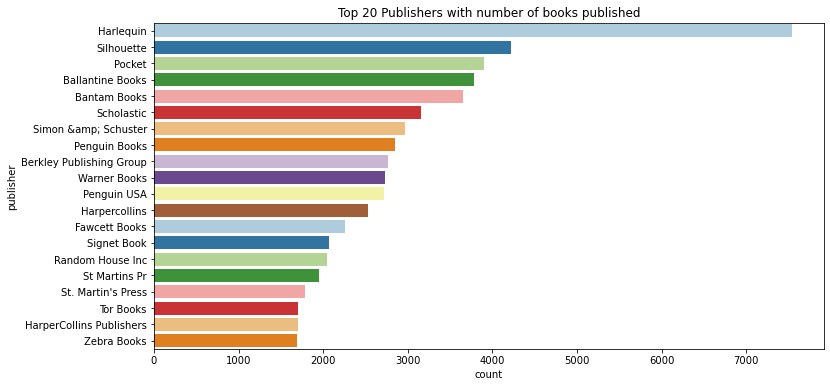

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=df_book,order=df_book['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

# User_data Dataset

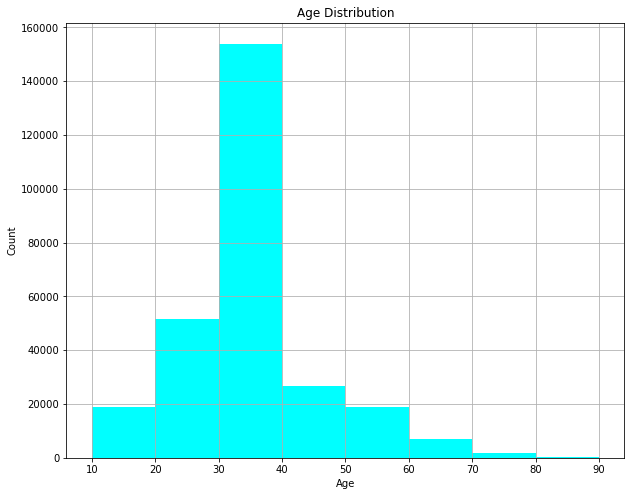

In [ ]:
plt.figure(figsize=(10,8))
df_user.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# RATING DATASET

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

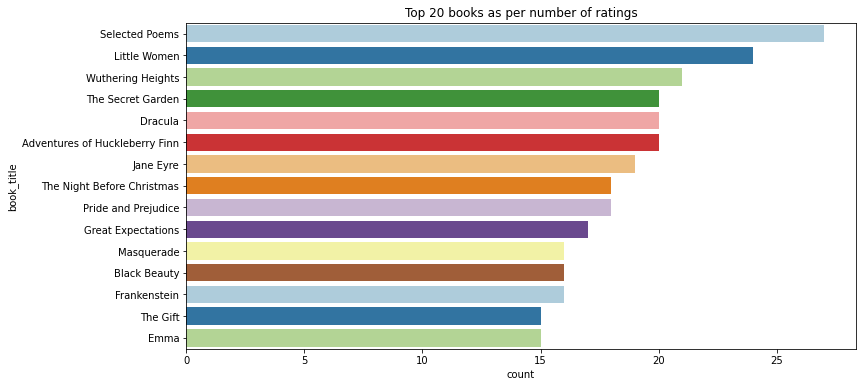

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= df_book, order=df_book['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<AxesSubplot:xlabel='book_rating', ylabel='count'>

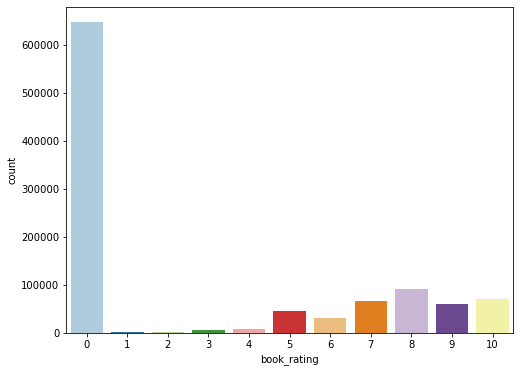

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Explicit Ratings')

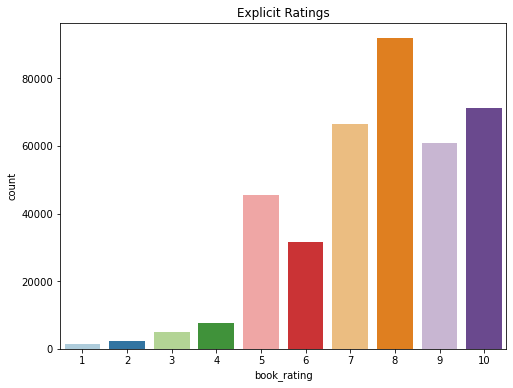

In [ ]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

# Recommendation System

In [ ]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [ ]:

ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


In [ ]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(df_book, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,123629,9


In [ ]:
print(new_book_df.shape)

(383842, 10)


In [ ]:
new_book_df['book_title'].count()

383842

In [ ]:
new_book_df['book_title'].nunique()

135567

In [ ]:
# top ten books as per book ratings and recommendation
top_ten_books= pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,book_rating
book_title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


# Popularity Based Recommonder System

In [ ]:
ratings_with_name = df_rating.merge(df_book,on='isbn')

In [ ]:
num_rating_df = ratings_with_name.groupby('book_title').count()['book_rating'].reset_index()
num_rating_df.rename(columns={'book_rating':'num_ratings'},inplace=True)
num_rating_df


,book_title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [ ]:
avg_rating_df = ratings_with_name.groupby('book_title').mean()['book_rating'].reset_index()
avg_rating_df.rename(columns={'book_rating':'avg_rating'},inplace=True)
avg_rating_df

,book_title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [ ]:
popular_df = num_rating_df.merge(avg_rating_df,on='book_title')
popular_df

,book_title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [ ]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)


In [ ]:
df_book

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
popular_df = popular_df.merge(df_book,on='book_title').drop_duplicates('book_title')[['book_title','book_author','image_url_m','num_ratings','avg_rating']]


In [ ]:
popular_df['image_url_m'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

# Collaborative Filtering Based Recommender System


In [ ]:
x = ratings_with_name.groupby('user_id').count()['book_rating'] > 200
padhe_likhe_users = x[x].index

In [ ]:
filtered_rating = ratings_with_name[ratings_with_name['user_id'].isin(padhe_likhe_users)]


In [ ]:
y = filtered_rating.groupby('book_title').count()['book_rating']>=50
famous_books = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]


In [ ]:
pt = final_ratings.pivot_table(index='book_title',columns='user_id',values='book_rating')


In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
book_title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity_scores = cosine_similarity(pt)


In [ ]:
similarity_scores.shape


(706, 706)

In [ ]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = df_book[df_book['book_title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('book_title')['book_title'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['book_author'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['image_url_m'].values))
        
        data.append(item)
    
    return data

In [ ]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [ ]:
pt.index[545]

"The Handmaid's Tale"

In [ ]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [ ]:
df_book.drop_duplicates('book_title')

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(df_book,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

# Conlusion